<a href="https://colab.research.google.com/github/segomezz/Proyecto-clasificacion-de-cacao/blob/Sebastian/Clasificaci%C3%B3n_del_cacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**<h1><center> </center></h1>**

**<h1><center> Proyecto: Clasificación de etapa de maduración del cacao </center></h1>**

**<h2><center> Visión Artificial - 2024-2</center></h2>**

<center><img src="https://upload.wikimedia.org/wikipedia/commons/c/c4/Escudo_unal_2016.png" width="100"></center>

---
<center>

<h1> Integrantes: </h1>


Sebastian Gomez Zapata: segomezz@unal.edu.co

Harrison Zuleta Montoya : hzuletam@unal.edu.co

Mateo Sanchez : matsanchez@unal.edu.co

Isaac Luna Herrera : ilunah@unal.edu.co

David Castrillón Vallejo : dacastrillon@unal.edu.co



</center>

# Contexto del problema

El cacao es uno de los cultivos más importantes a nivel mundial, tanto por su valor económico como por su rol cultural y social, especialmente en países tropicales donde es una fuente vital de ingresos para millones de agricultores. Este cultivo es la base para la producción de chocolate, un producto ampliamente consumido globalmente. Sin embargo, el proceso de cosecha del cacao enfrenta varios desafíos, uno de los cuales es determinar el momento adecuado para recolectar los frutos. Si los frutos se cosechan demasiado temprano o demasiado tarde, pueden perder calidad, lo que afecta el sabor, el rendimiento y, en última instancia, la rentabilidad del cultivo. La falta de automatización en la clasificación de la maduración del cacao obliga a los agricultores a depender de métodos manuales, que son lentos, propensos a errores humanos y requieren una gran cantidad de mano de obra. Este enfoque tradicional no solo reduce la eficiencia, sino que también aumenta el riesgo de cosechar frutos en la etapa incorrecta, lo que puede generar pérdidas económicas significativas y afectar la calidad del grano.

En este contexto, generar un modelo de visión artificial para predecir el nivel de maduración del fruto de cacao se vuelve fundamental para optimizar los procesos agrícolas y mejorar la calidad del cacao producido. Este modelo permitiría automatizar la clasificación de los frutos en sus diferentes etapas de maduración, lo que facilitaría la cosecha en el momento óptimo. Un manejo adecuado de la cosecha es esencial para garantizar la calidad del grano y maximizar los rendimientos. Además, al automatizar este proceso, se reduce el error humano y se incrementa la eficiencia en el campo, permitiendo a los agricultores tomar decisiones más precisas y basadas en datos. Esto no solo mejoraría la productividad, sino que también contribuiría a la sostenibilidad del cultivo, ya que se podrían reducir desperdicios y pérdidas de cosechas no maduras o sobre-maduras.

# Procedimiento Empleado

## Importación de librerías

Como primer paso se comenzará con todas la importación de todas las librerías necesarias para el proyecto

In [28]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

## Análisis de dataset

El dataset RipSetCocoaCNCH12 fue desarrollado por la Compañía Nacional de Chocolates y recopila imágenes de la variedad de cacao CNCH12 en la finca de la compañía ubicada en el municipio de Támesis, Antioquia, Colombia (5°43′02″ N, 75°41′25″ W), a una altitud promedio de 1100 m. Las imágenes fueron tomadas durante la principal temporada de cosecha, entre el 1 de diciembre de 2022 y el 17 de febrero de 2023.

El período promedio de maduración de las mazorcas de cacao es de 6 a 7 meses, aunque puede variar según las condiciones agronómicas y climáticas. Los agrónomos definieron las etapas de madurez en rangos de dos meses, basándose en diferencias físicas y químicas. Las imágenes se clasificaron en cinco clases según la madurez de las mazorcas:

1.	Clase 1 (0–2 meses)
2.	Clase 2 (2–4 meses)
3.	Clase 3 (4–6 meses)
4.	Clase 4 (>6 meses)
5.	Clase A (Abortos): Mazorcas que iniciaron su crecimiento pero murieron por plagas, enfermedades o problemas fisiológicos.

El dataset contiene dos carpetas principales:
1.	Anotaciones en formato COCO 1.0.
2.	Imágenes en formato de máscara de segmentación 1.1.

Las imágenes están organizadas en subcarpetas por clase predominante, aunque una imagen puede contener instancias de varias clases.

Finalmente se puede observar en esta tabla el número de clases.

| Clase | Nombre de clase           | Instancias |
|-------|-----------------------|-----------|
| C1    | Clase 1 (0–2 meses)  | 3278      |
| C2    | Clase 2 (2–4 meses)  | 1688      |
| C3    | Clase 3 (4–6 meses)  | 1519      |
| C4    | Clase (>6 meses) | 1169   |
| CA    | Abortos             | 263       |
| **Total** |                   | **7917**  |

El dataset ocupa un espacio de 27 gb por lo cual se hará una copia en google drive para acceder desde ahí, el archivo se llama Dataset y está en formato .zip

In [29]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Ahora se procede a descomprimir el dataset

Mostrando imagen aleatoria: /content/drive/My Drive/Dataset/RipSetCocoaCNCH12/Segmentation_mask_11/SegmentationObject_C2/20221227_083318.png


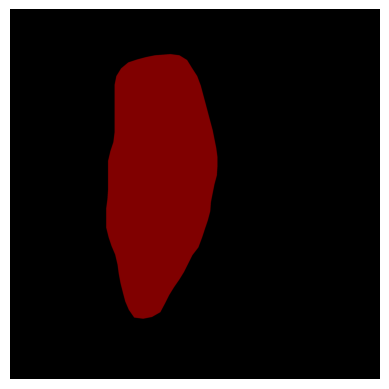

In [30]:
unzip_dir = '/content/drive/My Drive/Dataset'



# Listar todas las imágenes en la carpeta descomprimida
image_extensions = ('.jpg', '.jpeg', '.png')
image_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(unzip_dir)
               for f in filenames if f.lower().endswith(image_extensions)]

# Verificar si se encontraron imágenes
if not image_files:
    print("No se encontraron imágenes en el archivo descomprimido.")
else:
    # Seleccionar una imagen aleatoria
    random_image_path = random.choice(image_files)
    print(f"Mostrando imagen aleatoria: {random_image_path}")

    # Mostrar la imagen
    image = Image.open(random_image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [31]:
!git config --global user.name "segomezz"
!git config --global user.email "segomezz@unal.edu.co"

In [32]:
!git clone https://github.com/segomezz/Proyecto-clasificacion-de-cacao.git

Cloning into 'Proyecto-clasificacion-de-cacao'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 2), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 4.83 KiB | 4.83 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [33]:
%cd Proyecto-clasificacion-de-cacao

/content/Proyecto-clasificacion-de-cacao/Proyecto-clasificacion-de-cacao/Proyecto-clasificacion-de-cacao


In [34]:
!pwd


/content/Proyecto-clasificacion-de-cacao/Proyecto-clasificacion-de-cacao/Proyecto-clasificacion-de-cacao


In [35]:
!git checkout Sebastian

Branch 'Sebastian' set up to track remote branch 'Sebastian' from 'origin'.
Switched to a new branch 'Sebastian'


In [36]:
!git config --global user.name "segomezz"
!git config --global user.email "segomezz@unal.edu.co"

In [37]:
!ls

Proyecto.ipynb	README.md


In [39]:
!git status

On branch Sebastian
Your branch is up to date with 'origin/Sebastian'.

nothing to commit, working tree clean


# Referencias
1. Zenodo. (2023). *RipSetCocoaCNCH12: Labeled Dataset for Ripeness Stage Detection, Semantic and Instance Segmentation of Cocoa Pods*. Zenodo. [https://zenodo.org/records/7968315](https://zenodo.org/records/7968315)

2. MDPI. (2023). *RipSetCocoaCNCH12 Dataset*. *Journal of Imaging*, 8(6), 112. [https://www.mdpi.com/2306-5729/8/6/112](https://www.mdpi.com/2306-5729/8/6/112)